<a href="https://colab.research.google.com/github/dflannelly/machineLearningExample/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning
You will create a machine learning model that is trained on the MNIST data set. [The MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) is a classic benchmark dataset in the field of machine learning and computer vision. It consists of a set of 70,000 handwritten digit images, each of which is a grayscale image of size 28x28 pixels.

The dataset is split into two subsets: a training set of 60,000 images and a test set of 10,000 images. The training set is used to train a machine learning model, while the test set is used to evaluate the performance of the model on new, unseen data.

The digits in the dataset were collected from a variety of sources, including high school students and employees of the United States Census Bureau.

The MNIST dataset has been used extensively to evaluate the performance of machine learning models for image classification tasks. Many popular machine learning frameworks, including TensorFlow and PyTorch, provide built-in support for loading and working with the MNIST dataset.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Make predictions on new data
predictions = model.predict(test_images)

# Visualize the predictions
class_names = [str(i) for i in range(10)]
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                class_names[true_label]),
                                color=color)
plt.show()

DO: Epoch is how many times the model is trained on the training data set. Change the number of epochs that the model is trained on and notice how that affects the loss and accuracy of the model.[link text]

DO: Change other parameters in the code block above and notice what changes your code made.

Test your model: Use software to create a 28 x 28 image with a number drawn on it. Upload the image into the google colab workspace, change the path to the image and then run the model to see how well it identifies your 'handwriting'

1/1 [==============================] - 0s 120ms/step


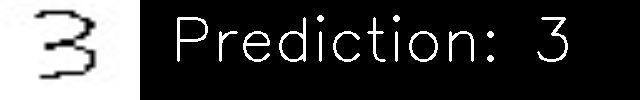

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load the trained model

# Load the image and convert it to grayscale
image = cv2.imread("Three.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize the image to 28x28 pixels (the size expected by the model)
resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

# Normalize the pixel values to be between 0 and 1
normalized = resized / 255.0

# Reshape the image to be a 1x28x28x1 array (the shape expected by the model)
reshaped = normalized.reshape((1, 28, 28, 1))

# Use the model to predict the label of the image
prediction = model.predict(reshaped)[0]
predicted_label = np.argmax(prediction)




# Create an output image with the predicted label
output_image = np.zeros((100, 500, 3), dtype=np.uint8)
cv2.putText(output_image, "Prediction: {}".format(predicted_label), (30, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2)

# Resize the original image to have the same height as the output image
image = cv2.resize(image, (int(output_image.shape[1] / output_image.shape[0] * image.shape[0]), output_image.shape[0]))

# Display the image and the predicted label side by side
cv2_imshow(np.hstack([image, output_image]))

#DO:Explore other common machine learning datasets

Below are common machine learning datasets that you should be able to find resources on. See if you can find code to build a model and test the model using one of the datasets below.

* CIFAR-10: Image classification dataset with 50,000 training images and 10,000 test images of size 32x32. Contains 10 classes of objects.

*CIFAR-100: Image classification dataset with 50,000 training images and 10,000 test images of size 32x32. Contains 100 fine-grained classes of objects.

* Fashion-MNIST: Clothing image classification dataset with 60,000 training images and 10,000 test images of size 28x28. Contains 10 classes of clothing items.

*IMDB movie reviews: A binary sentiment analysis dataset of 25,000 movie reviews for training and 25,000 for testing. The reviews have been preprocessed and each one is associated with a label indicating a positive or negative sentiment.